In [1]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from dotenv import load_dotenv

# Charger les variables d'environnement depuis le fichier .env
load_dotenv()

# Récupérer les clés API et URL depuis le fichier .env
mongodb_url = os.getenv("MONGODB_URL")
client = MongoClient(mongodb_url)  
db = client['API_Project']  # Remplace par le nom de ta base de données
collection = db['Consommation_energetique']  # Remplace par le nom de ta collection

# Récupérer les données depuis MongoDB
data = pd.DataFrame(list(collection.find()))

# Afficher les premières lignes pour vérifier la structure des données
print(data.head())



In [ ]:


# Vérification des types de données et des valeurs manquantes
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99840 entries, 0 to 99839
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   _id                  99840 non-null  object
 1   ﻿Code INSEE région   99840 non-null  object
 2   Région               99840 non-null  object
 3   Nature               99840 non-null  object
 4   Date                 99840 non-null  object
 5   Heure                99840 non-null  object
 6   Date - Heure         99840 non-null  object
 7   Consommation (MW)    99840 non-null  object
 8   Thermique (MW)       99840 non-null  object
 9   Nucléaire (MW)       99840 non-null  object
 10  Eolien (MW)          99840 non-null  object
 11  Solaire (MW)         99840 non-null  object
 12  Hydraulique (MW)     99840 non-null  object
 13  Pompage (MW)         99840 non-null  object
 14  Bioénergies (MW)     99840 non-null  object
 15  Ech. physiques (MW)  99840 non-null  object
 16  Stoc

In [ ]:
# Statistiques descriptives des colonnes numériques
print(data.describe())


                             _id ﻿Code INSEE région    Région  \
count                      99840              99840     99840   
unique                     99840                  1         1   
top     672fd4560fe28f4022e6a0f9                 53  Bretagne   
freq                           1              99840     99840   

                    Nature        Date  Heure               Date - Heure  \
count                99840       99840  99840                      99840   
unique                   1         528     96                      50684   
top     Données temps réel  2024-10-24  16:15  2024-03-31T03:15:00+02:00   
freq                 99840         192   1040                          4   

       Consommation (MW) Thermique (MW) Nucléaire (MW)  ... TCH Nucléaire (%)  \
count              99840          99840          99840  ...             99840   
unique              2738            756              2  ...                 1   
top                 2130             16           

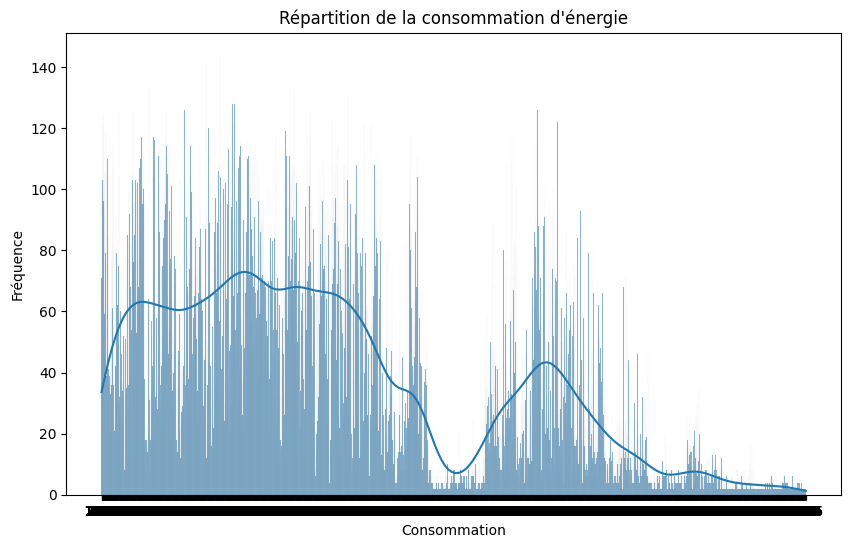

In [ ]:
# Histogramme de la consommation d'énergie
plt.figure(figsize=(10, 6))
sns.histplot(data['Consommation (MW)'], bins=30, kde=True)  
plt.title('Répartition de la consommation d\'énergie')
plt.xlabel('Consommation')
plt.ylabel('Fréquence')
plt.show()

In [ ]:
print(data.dtypes)


_id                    object
﻿Code INSEE région     object
Région                 object
Nature                 object
Date                   object
Heure                  object
Date - Heure           object
Consommation (MW)      object
Thermique (MW)         object
Nucléaire (MW)         object
Eolien (MW)            object
Solaire (MW)           object
Hydraulique (MW)       object
Pompage (MW)           object
Bioénergies (MW)       object
Ech. physiques (MW)    object
Stockage batterie      object
Déstockage batterie    object
TCO Thermique (%)      object
TCH Thermique (%)      object
TCO Nucléaire (%)      object
TCH Nucléaire (%)      object
TCO Eolien (%)         object
TCH Eolien (%)         object
TCO Solaire (%)        object
TCH Solaire (%)        object
TCO Hydraulique (%)    object
TCH Hydraulique (%)    object
TCO Bioénergies (%)    object
TCH Bioénergies (%)    object
Column 68              object
dtype: object


In [ ]:

# Liste des colonnes à convertir en numérique
numeric_columns = [
    'Consommation (MW)', 'Thermique (MW)', 'Nucléaire (MW)', 'Eolien (MW)', 
    'Solaire (MW)', 'Hydraulique (MW)', 'Pompage (MW)', 'Bioénergies (MW)', 
    'Ech. physiques (MW)', 'Stockage batterie', 'Déstockage batterie', 
    'TCO Thermique (%)', 'TCH Thermique (%)', 'TCO Nucléaire (%)', 'TCH Nucléaire (%)', 
    'TCO Eolien (%)', 'TCH Eolien (%)', 'TCO Solaire (%)', 'TCH Solaire (%)', 
    'TCO Hydraulique (%)', 'TCH Hydraulique (%)', 'TCO Bioénergies (%)', 'TCH Bioénergies (%)'
]

# Convertir les colonnes en numérique et traiter les erreurs (les valeurs non numériques seront remplacées par NaN)
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')


In [ ]:
print(data.dtypes)

_id                     object
﻿Code INSEE région      object
Région                  object
Nature                  object
Date                    object
Heure                   object
Date - Heure            object
Consommation (MW)      float64
Thermique (MW)         float64
Nucléaire (MW)         float64
Eolien (MW)            float64
Solaire (MW)           float64
Hydraulique (MW)       float64
Pompage (MW)           float64
Bioénergies (MW)       float64
Ech. physiques (MW)    float64
Stockage batterie      float64
Déstockage batterie    float64
TCO Thermique (%)      float64
TCH Thermique (%)      float64
TCO Nucléaire (%)      float64
TCH Nucléaire (%)      float64
TCO Eolien (%)         float64
TCH Eolien (%)         float64
TCO Solaire (%)        float64
TCH Solaire (%)        float64
TCO Hydraulique (%)    float64
TCH Hydraulique (%)    float64
TCO Bioénergies (%)    float64
TCH Bioénergies (%)    float64
Column 68               object
dtype: object


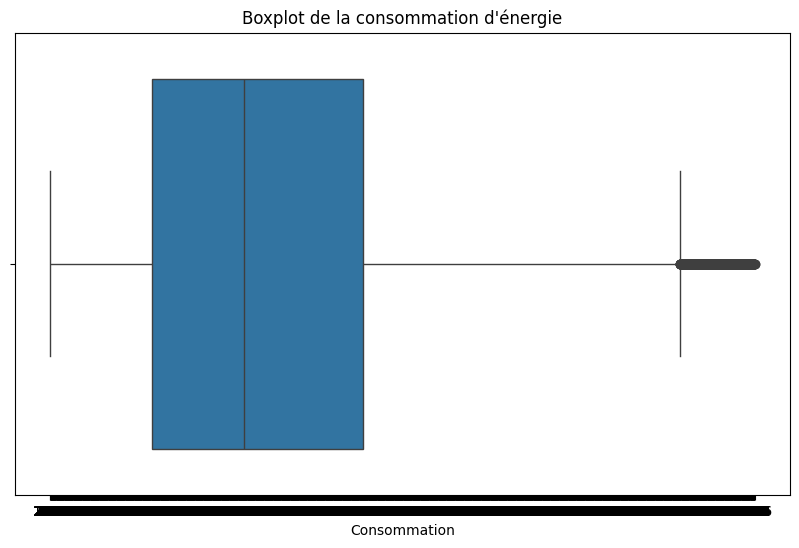

In [ ]:

# Boxplot pour observer les anomalies dans la consommation d'énergie
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Consommation (MW)']) 
plt.title('Boxplot de la consommation d\'énergie')
plt.xlabel('Consommation')
plt.show()


In [ ]:
#Remplacer les valeurs NaN par 0 ou une autre valeur
data = data.fillna(0)

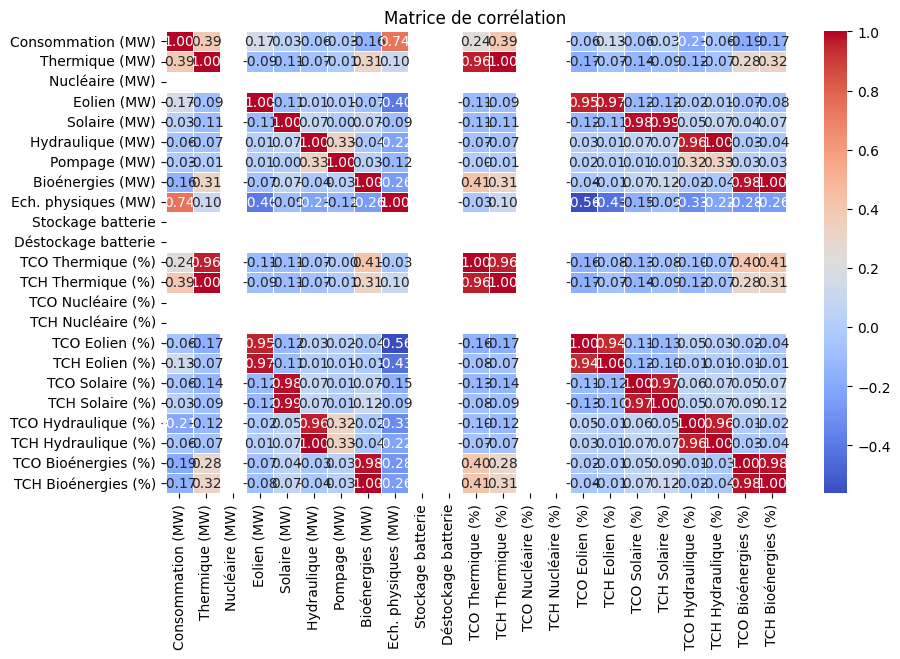

In [ ]:

# Visualisation des corrélations entre les différentes variables 
plt.figure(figsize=(10, 6))
# Sélectionner uniquement les colonnes numériques pour la corrélation
data_numeric = data[numeric_columns]

# Calculer la matrice de corrélation
correlation_matrix = data_numeric.corr()  # Calculer la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

In [ ]:
data['Date - Heure'] = pd.to_datetime(data['Date - Heure'], utc=True)


In [ ]:
data['Date - Heure'] = pd.to_datetime(data['Date - Heure']).dt.tz_localize(None)


In [ ]:
print(data['Date - Heure'].head())


0   2024-03-23 15:15:00
1   2024-03-23 16:00:00
2   2024-03-23 17:00:00
3   2024-03-23 17:45:00
4   2024-03-23 18:15:00
Name: Date - Heure, dtype: datetime64[ns]


In [ ]:

# Exploration des tendances temporelles

data.set_index('Date - Heure', inplace=True)


In [ ]:

# Consommation totale par mois
monthly_consumption = data.resample('M').sum()  # Regrouper par mois
plt.figure(figsize=(10, 6))
monthly_consumption['Consommation (MW)'].plot()
plt.title('Consommation totale d\'énergie par mois')
plt.xlabel('Mois')
plt.ylabel('Consommation')
plt.show()

In [ ]:

# Consommation moyenne par jour
daily_consumption = data.resample('D').mean()  # Consommation moyenne par jour
plt.figure(figsize=(10, 6))
daily_consumption['consommation'].plot()
plt.title('Consommation moyenne d\'énergie par jour')
plt.xlabel('Jour')
plt.ylabel('Consommation')
plt.show()

In [ ]:
# Comparaison de la consommation d'énergie entre différentes sources de production 
plt.figure(figsize=(10, 6))
sns.boxplot(x='type_de_production', y='consommation', data=data) 
plt.title('Consommation d\'énergie par type de production')
plt.xlabel('Type de production')
plt.ylabel('Consommation')
plt.show()